# PeptideSmilesEncoder: Encoding Peptides to SMILES

SMILES representations of peptides with PTMs enable advanced ML applications in proteomics:

* Graph Neural Networks (GNNs): SMILES convert to molecular graphs, allowing GNNs to capture complex structural relationships, including PTM arrangements.
* Transformer Models: Treating SMILES as sequences enables use of state-of-the-art transformer architectures, adept at learning long-range dependencies in peptide structures.
* Transfer Learning: Pre-trained models on large chemical datasets can be fine-tuned for specific proteomic tasks, leveraging broader chemical knowledge.
* Interpretability: Graph-based models provide insights into which parts of the peptide, including PTMs, contribute most to predicted properties.

This notebook demonstrates the functionality of the `PeptideSmilesEncoder` class, which is used to encode peptide sequences into SMILES (Simplified Molecular Input Line Entry System) strings. We'll go through various examples, including peptides with and without modifications, and visualize the resulting molecules.

In [1]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Draw
from rdkit.Chem import rdCoordGen
from rdkit.Chem import rdFingerprintGenerator
from rdkit.Chem import MACCSkeys
from rdkit.Chem.AtomPairs import Pairs

from alphabase.peptide.precursor import get_mod_seq_formula
from alphabase.constants.atom import CHEM_MONO_MASS, MASS_H2O
from alphabase.smiles.peptide import PeptideSmilesEncoder

# Initialize the encoder
encoder = PeptideSmilesEncoder()

## 1. Encoding a Peptide without Modifications

Peptide sequence: QMNPHIR


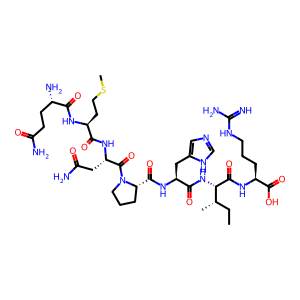

SMILES: [H]N([H])[C@@H](CCC(N)=O)C(=O)N([H])[C@@H](CCSC)C(=O)N([H])[C@@H](CC(N)=O)C(=O)N1CCC[C@H]1C(=O)N([H])[C@@H](Cc1cnc[nH]1)C(=O)N([H])[C@H](C(=O)N([H])[C@@H](CCCNC(=N)N)C(=O)O)[C@@H](C)CC
Exact Mass: 876.4388
Expected mass: 876.4388
Mass difference: 0.0000


In [2]:
def visualize_peptide(smiles, title):
    mol = Chem.MolFromSmiles(smiles)
    rdCoordGen.AddCoords(mol)
    img = Draw.MolToImage(mol)
    display(img)
    print(f"SMILES: {smiles}")
    print(f"Exact Mass: {Descriptors.ExactMolWt(mol) - MASS_H2O:.4f}")

sequence = "QMNPHIR"
smiles = encoder.peptide_to_smiles(sequence)

print(f"Peptide sequence: {sequence}")
visualize_peptide(smiles, "Peptide without modifications")

# Verify mass
expected_mass = np.sum([CHEM_MONO_MASS[elem] * n for elem, n in get_mod_seq_formula(sequence, "")])
actual_mass = Descriptors.ExactMolWt(Chem.MolFromSmiles(smiles)) - MASS_H2O
print(f"Expected mass: {expected_mass:.4f}")
print(f"Mass difference: {abs(actual_mass - expected_mass):.4f}")

## 2. Encoding a Peptide with Modifications

Peptide sequence: QMNPHIR
Modifications: Gln->pyro-Glu@Q^Any_N-term;Oxidation@M
Modification sites: 1;2


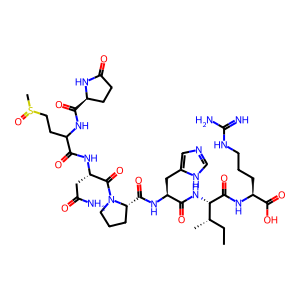

SMILES: [H]N(C(=O)[C@@H]1CCC(=O)N1[H])C(CCS(C)=O)C(=O)N([H])[C@@H](CC(N)=O)C(=O)N1CCC[C@H]1C(=O)N([H])[C@@H](Cc1cnc[nH]1)C(=O)N([H])[C@H](C(=O)N([H])[C@@H](CCCNC(=N)N)C(=O)O)[C@@H](C)CC
Exact Mass: 875.4072
Expected mass: 875.4072
Mass difference: 0.0000


In [3]:
sequence = "QMNPHIR"
mods = "Gln->pyro-Glu@Q^Any_N-term;Oxidation@M"
mod_sites = "1;2"

smiles = encoder.peptide_to_smiles(sequence, mods, mod_sites)

print(f"Peptide sequence: {sequence}")
print(f"Modifications: {mods}")
print(f"Modification sites: {mod_sites}")
visualize_peptide(smiles, "Peptide with modifications")

# Verify mass
expected_mass = np.sum([CHEM_MONO_MASS[elem] * n for elem, n in get_mod_seq_formula(sequence, mods)])
actual_mass = Descriptors.ExactMolWt(Chem.MolFromSmiles(smiles)) - MASS_H2O
print(f"Expected mass: {expected_mass:.4f}")
print(f"Mass difference: {abs(actual_mass - expected_mass):.4f}")

## 3. N-terminal Modification

Peptide sequence: QMNPHIR
Modifications: Acetyl@Any_N-term
Modification sites: 0


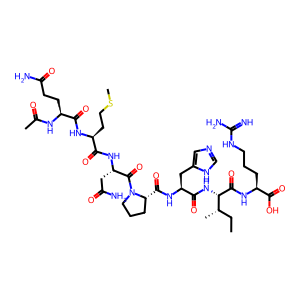

SMILES: [H]N(C(=O)[C@H](Cc1cnc[nH]1)N([H])C(=O)[C@@H]1CCCN1C(=O)[C@H](CC(N)=O)N([H])C(=O)[C@H](CCSC)N([H])C(=O)[C@H](CCC(N)=O)N([H])C(C)=O)[C@H](C(=O)N([H])[C@@H](CCCNC(=N)N)C(=O)O)[C@@H](C)CC
Exact Mass: 918.4494
Expected mass: 918.4494
Mass difference: 0.0000


In [4]:
sequence = "QMNPHIR"
mods = "Acetyl@Any_N-term"
mod_sites = "0"

smiles = encoder.peptide_to_smiles(sequence, mods, mod_sites)

print(f"Peptide sequence: {sequence}")
print(f"Modifications: {mods}")
print(f"Modification sites: {mod_sites}")
visualize_peptide(smiles, "Peptide with N-terminal modification")

# Verify mass
expected_mass = np.sum([CHEM_MONO_MASS[elem] * n for elem, n in get_mod_seq_formula(sequence, mods)])
actual_mass = Descriptors.ExactMolWt(Chem.MolFromSmiles(smiles)) - MASS_H2O
print(f"Expected mass: {expected_mass:.4f}")
print(f"Mass difference: {abs(actual_mass - expected_mass):.4f}")

## 4. C-terminal Modification

Peptide sequence: QMNPHIR
Modifications: Amidated@Any_C-term
Modification sites: -1


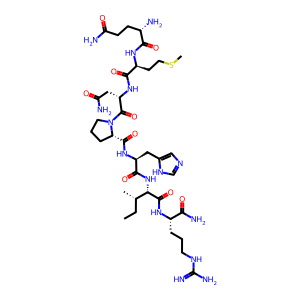

SMILES: [H]N([H])[C@@H](CCC(N)=O)C(=O)N([H])[C@@H](CCSC)C(=O)N([H])[C@@H](CC(N)=O)C(=O)N1CCC[C@H]1C(=O)N([H])[C@@H](Cc1cnc[nH]1)C(=O)N([H])[C@H](C(=O)N([H])[C@@H](CCCNC(=N)N)C(N)=O)[C@@H](C)CC
Exact Mass: 875.4548
Expected mass: 875.4548
Mass difference: 0.0000


In [5]:
sequence = "QMNPHIR"
mods = "Amidated@Any_C-term"
mod_sites = "-1"

smiles = encoder.peptide_to_smiles(sequence, mods, mod_sites)

print(f"Peptide sequence: {sequence}")
print(f"Modifications: {mods}")
print(f"Modification sites: {mod_sites}")
visualize_peptide(smiles, "Peptide with C-terminal modification")

# Verify mass
expected_mass = np.sum([CHEM_MONO_MASS[elem] * n for elem, n in get_mod_seq_formula(sequence, mods)])
actual_mass = Descriptors.ExactMolWt(Chem.MolFromSmiles(smiles)) - MASS_H2O
print(f"Expected mass: {expected_mass:.4f}")
print(f"Mass difference: {abs(actual_mass - expected_mass):.4f}")

## 5. Multiple Modifications

Peptide sequence: QMNPSIR
Modifications: Acetyl@Any_N-term;Oxidation@M;Phospho@S
Modification sites: 0;2;5


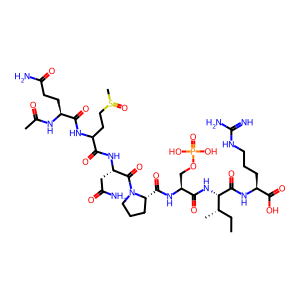

SMILES: [H]N(C(=O)[C@H](CCC(N)=O)N([H])C(C)=O)C(CCS(C)=O)C(=O)N([H])[C@@H](CC(N)=O)C(=O)N1CCC[C@H]1C(=O)N([H])[C@@H](COP(=O)(O)O)C(=O)N([H])[C@H](C(=O)N([H])[C@@H](CCCNC(=N)N)C(=O)O)[C@@H](C)CC
Exact Mass: 964.3838
Expected mass: 964.3838
Mass difference: 0.0000


In [6]:
sequence = "QMNPSIR"
mods = "Acetyl@Any_N-term;Oxidation@M;Phospho@S"
mod_sites = "0;2;5"

smiles = encoder.peptide_to_smiles(sequence, mods, mod_sites)

print(f"Peptide sequence: {sequence}")
print(f"Modifications: {mods}")
print(f"Modification sites: {mod_sites}")
visualize_peptide(smiles, "Peptide with multiple modifications")

# Verify mass
expected_mass = np.sum([CHEM_MONO_MASS[elem] * n for elem, n in get_mod_seq_formula(sequence, mods)])
actual_mass = Descriptors.ExactMolWt(Chem.MolFromSmiles(smiles)) - MASS_H2O
print(f"Expected mass: {expected_mass:.4f}")
print(f"Mass difference: {abs(actual_mass - expected_mass):.4f}")

## Further usage:

### Molecular fingerprints

As we stated before, being able to represent a peptide as a SMILES opens some doors for us. Let's take a look at feature extraction using RDKit:

In [7]:
def get_fingerprint(mol, fp_type='morgan', **kwargs):
    """
    Generate molecular fingerprints for an RDKit mol object.
    
    Parameters
    ----------
    mol : rdkit.Chem.Mol
        RDKit mol object.
    fp_type : str, optional
        Type of fingerprint. Options are 'morgan', 'topological', 'maccs', 'atompair'.
        Default is 'morgan'.
    **kwargs : dict
        Additional keyword arguments for specific fingerprint parameters.
        
    Returns
    -------
    list
        Fingerprint bit vector.
    """
    if fp_type == 'morgan':
        radius = kwargs.get('radius', 2)
        nBits = kwargs.get('nBits', 2048)
        mfpgen = rdFingerprintGenerator.GetMorganGenerator(radius=radius,fpSize=nBits)
        fp = mfpgen.GetFingerprint(mol)
    
    elif fp_type == 'topological':
        minPath = kwargs.get('minPath', 1)
        maxPath = kwargs.get('maxPath', 7)
        fpSize = kwargs.get('fpSize', 2048)
        fp = Chem.RDKFingerprint(mol, minPath=minPath, maxPath=maxPath, fpSize=fpSize)
    
    elif fp_type == 'maccs':
        fp = MACCSkeys.GenMACCSKeys(mol)
    
    elif fp_type == 'atompair':
        nBits = kwargs.get('nBits', 2048)
        fp = Pairs.GetAtomPairFingerprintAsBitVect(mol, nBits=nBits)
    
    else:
        raise ValueError(f"Unknown fingerprint type: {fp_type}")
    
    return fp.ToList()


sequence = "QMNPSIR"
mods = "Acetyl@Any_N-term;Oxidation@M;Phospho@S"
mod_sites = "0;2;5"

smiles = encoder.peptide_to_smiles(sequence, mods, mod_sites)
np.array(get_fingerprint(Chem.MolFromSmiles(smiles), fp_type='topological')).shape

(2048,)

### Adjacency matrix

Now we can easily get an adjacency matrix to work with graph algorithms, numbers specify the bond type between the atoms

In [8]:
mol = Chem.MolFromSmiles(smiles)
adj_matrix = Chem.GetAdjacencyMatrix(mol, useBO=True)
print(adj_matrix.shape)
adj_matrix

(66, 66)


array([[0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 2., ..., 0., 0., 0.],
       [0., 2., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.]])

here we can see the types of corresponding atoms themselves:

In [9]:
for atom in mol.GetAtoms():
    print(atom.GetSymbol(), atom.GetIdx(), atom.GetDegree(), atom.GetTotalNumHs(), atom.GetFormalCharge(), atom.GetIsAromatic())

N 0 2 1 0 False
C 1 3 0 0 False
O 2 1 0 0 False
C 3 3 1 0 False
C 4 2 2 0 False
C 5 2 2 0 False
C 6 3 0 0 False
N 7 1 2 0 False
O 8 1 0 0 False
N 9 2 1 0 False
C 10 3 0 0 False
C 11 1 3 0 False
O 12 1 0 0 False
C 13 3 1 0 False
C 14 2 2 0 False
C 15 2 2 0 False
S 16 3 0 0 False
C 17 1 3 0 False
O 18 1 0 0 False
C 19 3 0 0 False
O 20 1 0 0 False
N 21 2 1 0 False
C 22 3 1 0 False
C 23 2 2 0 False
C 24 3 0 0 False
N 25 1 2 0 False
O 26 1 0 0 False
C 27 3 0 0 False
O 28 1 0 0 False
N 29 3 0 0 False
C 30 2 2 0 False
C 31 2 2 0 False
C 32 2 2 0 False
C 33 3 1 0 False
C 34 3 0 0 False
O 35 1 0 0 False
N 36 2 1 0 False
C 37 3 1 0 False
C 38 2 2 0 False
O 39 2 0 0 False
P 40 4 0 0 False
O 41 1 0 0 False
O 42 1 1 0 False
O 43 1 1 0 False
C 44 3 0 0 False
O 45 1 0 0 False
N 46 2 1 0 False
C 47 3 1 0 False
C 48 3 0 0 False
O 49 1 0 0 False
N 50 2 1 0 False
C 51 3 1 0 False
C 52 2 2 0 False
C 53 2 2 0 False
C 54 2 2 0 False
N 55 2 1 0 False
C 56 3 0 0 False
N 57 1 1 0 False
N 58 1 2 0 False
C 59 3 